In [ ]:
!pip install pytrends
!pip install newsapi-python
!pip install requests
!pip install beautifulsoup4
!pip install nltk wordcloud matplotlib
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import csv
import plotly.express as px
from bs4 import BeautifulSoup
from newsapi import NewsApiClient
from nltk.probability import FreqDist
from pytrends.request import TrendReq
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


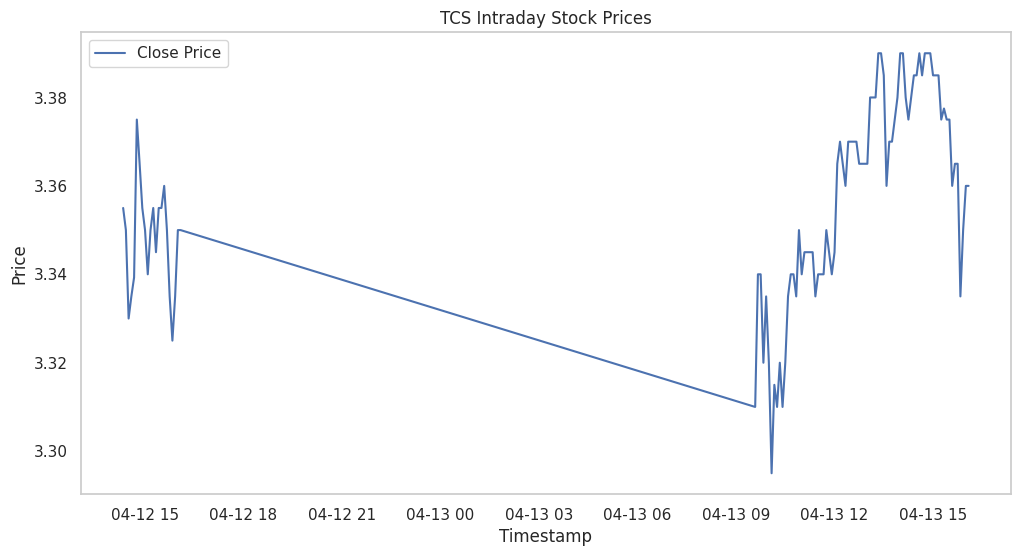

In [ ]:
# Replace the "demo" API key below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TCS&interval=5min&apikey=7LRS7R96FIBXB38Q&datatype=csv'
response = requests.get(url)

# Save the CSV data to a file
with open('stock_data.csv', 'wb') as file:
    file.write(response.content)

# Read the CSV data using pandas
data = pd.read_csv('stock_data.csv', index_col='timestamp', parse_dates=True)
data.sort_index(inplace=True)

# Create a plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('TCS Intraday Stock Prices')
plt.legend()
plt.grid()
plt.show()


In [ ]:
CSV_URL = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&horizon=3month&apikey=7LRS7R96FIBXB38Q'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

Streaming output truncated to the last 5000 lines.
['EPR', 'EPR Properties', '2023-05-02', '2023-03-31', '0.61', 'USD']
['EPRSQ', 'EPRSQ', '2023-05-10', '2023-03-31', '0', 'USD']
['EPRT', 'Essential Properties Realty Trust Inc', '2023-04-25', '2023-03-31', '0.22', 'USD']
['EPSN', 'Epsilon Energy Ltd', '2023-05-09', '2023-03-31', '', 'USD']
['EPWCF', 'EPWCF', '2023-06-06', '2023-03-31', '0', 'USD']
['EPWR', 'EPWR', '2023-05-11', '2023-03-31', '', 'USD']
['EPZM', 'EPZM', '2023-05-08', '2023-03-31', '', 'USD']
['EQ', 'Equillium Inc', '2023-05-10', '2023-03-31', '-0.27', 'USD']
['EQBK', 'Equity Bancshares Inc - Class A', '2023-04-18', '2023-03-31', '0.75', 'USD']
['EQC', 'Equity Commonwealth', '2023-05-02', '2023-03-31', '', 'USD']
['EQGPF', 'EQGPF', '2023-05-02', '2023-03-31', '', 'CAD']
['EQH', 'Equitable Holdings Inc', '2023-05-08', '2023-03-31', '1.32', 'USD']
['EQIX', 'Equinix Inc', '2023-05-03', '2023-03-31', '2.17', 'USD']
['EQNR', 'Equinor ASA', '2023-05-04', '2023-03-31', '1.11', 

In [ ]:
CSV_URL = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&horizon=3month&apikey=7LRS7R96FIBXB38Q'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

    # write the CSV data to a file with proper table and columns
    with open('earnings_calendar.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Company Name', 'Symbol', 'EPS Estimate', 'Reported EPS', 'Surprise (%)', 'Time', 'Date'])
        for row in my_list[1:]:  # skip the header row
            writer.writerow(row)

print("Data written to earnings_calendar.csv file")


Data written to earnings_calendar.csv file


In [ ]:
df = pd.read_csv('earnings_calendar.csv')

df.tail()  # display the first few rows of the dataframe


,Company Name,Symbol,EPS Estimate,Reported EPS,Surprise (%),Time,Date
7307,ZVRA,Zevra Therapeutics Inc,2023-05-10,2023-03-31,-0.23,USD,NaN
7308,ZWS,Zurn Elkay Water Solutions Corp,2023-04-24,2023-03-31,0.15,USD,NaN
7309,ZYME,Zymeworks BC Inc,2023-05-02,2023-03-31,NaN,USD,NaN
7310,ZYNE,Zynerba Pharmaceuticals Inc,2023-05-15,2023-03-31,-0.19,USD,NaN
7311,ZYXI,Zynex Inc,2023-04-26,2023-03-31,0.01,USD,NaN


In [ ]:
df['EPS Estimate'] = pd.to_numeric(df['EPS Estimate'], errors='coerce')

# Create a bar plot of the EPS Estimate for each company using Plotly Express
fig = px.bar(df, x='Symbol', y='EPS Estimate', text='EPS Estimate', title='EPS Estimate for Companies')

# Update the x-axis title
fig.update_xaxes(title_text='Company Symbol')

# Update the y-axis title
fig.update_yaxes(title_text='EPS Estimate')

# Show the plot
fig.show()

In [ ]:
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey=demo'
r = requests.get(url)
data = r.json()

# convert the JSON data to a Pandas dataframe
df = pd.json_normalize(data)

df.head()  # display the first few rows of the dataframe


,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
0,IBM,Common Stock,International Business Machines,International Business Machines Corporation (I...,51143,NYSE,USD,USA,TECHNOLOGY,COMPUTER & OFFICE EQUIPMENT,...,2.969,25.81,0.852,151.35,112.8,130.28,134.26,907106000,2023-03-10,2023-02-09


In [ ]:
api_key = '8306cc0dbb5f46b9bb256cb3dee6749c'
newsapi = NewsApiClient(api_key=api_key)

# Define your search query and parameters
query = 'Microsoft Stock'
language = 'en'
sort_by = 'relevancy'
page_size = 10

# Fetch the news articles
articles = newsapi.get_everything(q=query, language=language, sort_by=sort_by, page_size=page_size)['articles']


def extract_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([p.get_text() for p in paragraphs])
    return text

# Extract article text from the article URLs
article_texts = [extract_text_from_url(article['url']) for article in articles]


with open('news_articles.txt', 'w', encoding='utf-8') as f:
    for text in article_texts:
        f.write(text + '\n')


with open('news_articles.txt', 'r', encoding='utf-8') as f:
    content = f.read()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


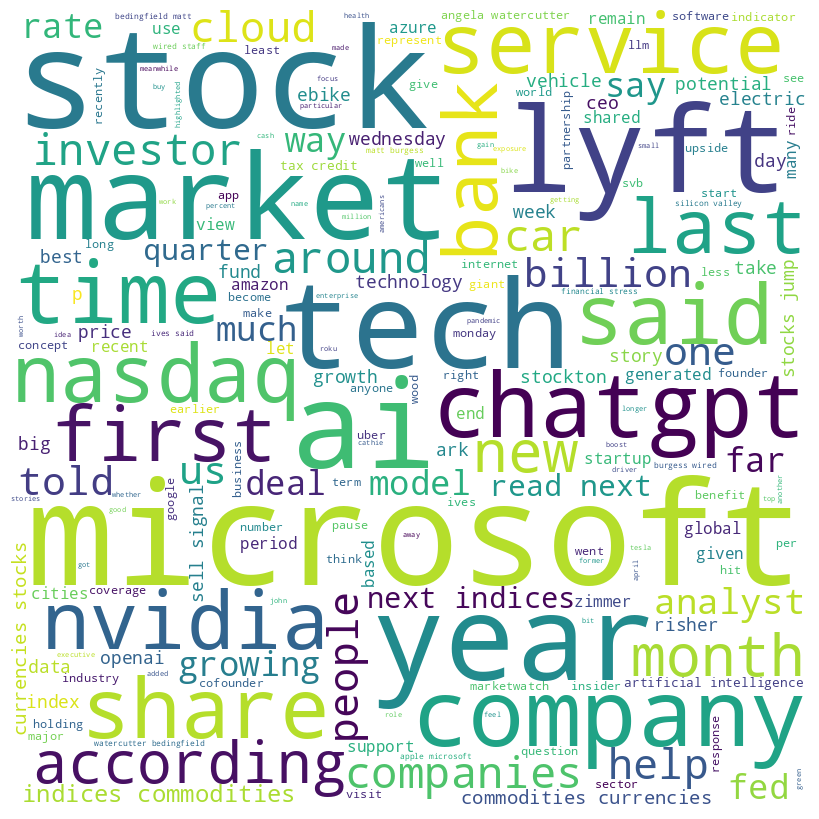

In [ ]:
# Download the NLTK stopword dataset
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize the text
tokens = nltk.word_tokenize(content)

# Remove stopwords and non-alphanumeric tokens
stopwords = set(nltk.corpus.stopwords.words('english')) | STOPWORDS
clean_tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stopwords]

# Generate a word cloud from the clean tokens
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=800).generate(' '.join(clean_tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


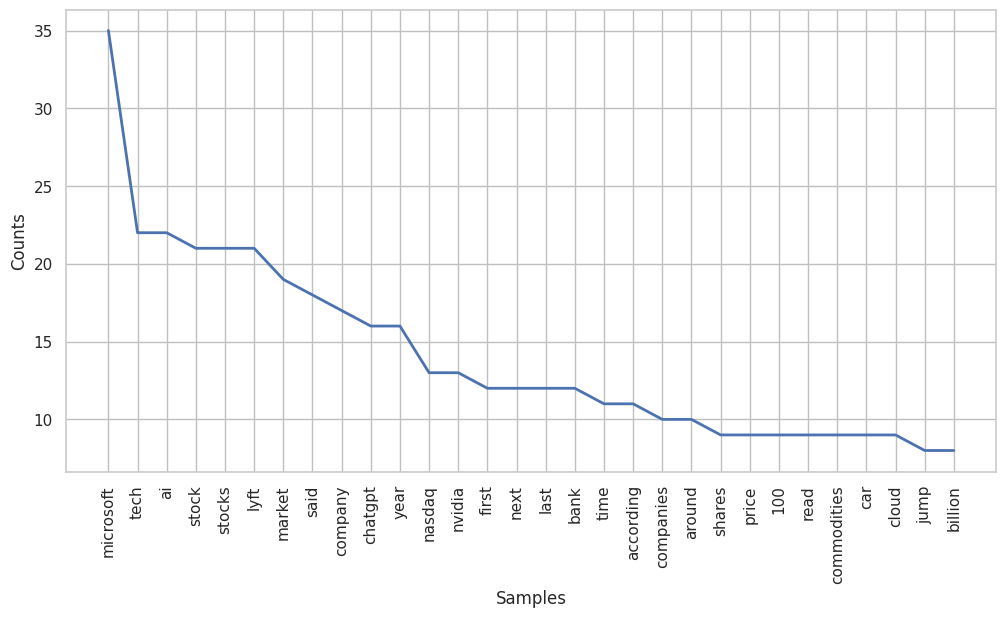

In [ ]:
# Create a frequency distribution of the clean tokens
freq_dist = FreqDist(clean_tokens)

# Plot the frequency distribution of the 30 most common words
plt.figure(figsize=(12, 6))
freq_dist.plot(30)
plt.show()


In [ ]:
from newsapi import NewsApiClient

# Initialize the NewsAPI client with your API key
api_key = '8306cc0dbb5f46b9bb256cb3dee6749c'
newsapi = NewsApiClient(api_key=api_key)

# calculate the date one year ago from today
today = datetime.now().date()
one_year_ago = today - timedelta(days=30)
from_date = one_year_ago.isoformat()

# get all articles about Apple from the past year, filtered by language and sorted by relevance
all_articles = newsapi.get_everything(q='Microsoft Stock',
                                      from_param=from_date,
                                      language='en',
                                      sort_by='relevancy')

# print the title and URL of each article in the response
for article in all_articles['articles']:
    print(article['title'])
    print(article['url'])


Cathie Wood catches up with the ChatGPT craze as Ark's internet fund snaps up Microsoft stock for the 1st time
https://markets.businessinsider.com/news/etf/cathie-wood-ark-invest-chatgpt-microsoft-stock-artificial-intelligence-2023-3
Lyft’s Vibe Shift Signals the End of the Gig Economy Dream
https://www.wired.com/story/plaintext-lyft-vibe-shift-signals-the-end-of-the-gig-economy-dream/
The S&P 500 hasn't been this dependent on just 2 stocks since 1978 as Apple and Microsoft become havens
https://markets.businessinsider.com/news/stocks/apple-microsoft-stock-market-weighting-sp500-dominance-index-aapl-msft-2023-3
ChatGPT is worth at least $20 per share to Microsoft as it ramps up its monetization efforts of the AI chatbot, Wedbush says
https://markets.businessinsider.com/news/stocks/microsoft-stock-price-outlook-chatgpt-monetization-openai-azure-cloud-growth-2023-4
Nvidia adds an eye-popping $300 billion in market value as the AI boom powers its best quarter in 2 decades
https://markets.

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)
stock_name = 'AAPL'
# Create a list of keywords
keywords = [stock_name]

# Set the timeframe and geo (location) parameters
timeframe = 'now 7-d' # past 7 days
geo = '' # worldwide

# Build the payload
pytrends.build_payload(keywords, timeframe=timeframe, geo=geo)

interest_over_time_df = pytrends.interest_over_time()

# Print the interest over time data
print(interest_over_time_df)


related_queries = pytrends.related_queries()

# Print the related queries data
# Create a DataFrame for related queries
related_queries_df = pd.DataFrame(related_queries[stock_name]['top'])

# Print the related queries DataFrame
related_queries_df




                     AAPL  isPartial
date                                
2023-04-07 21:00:00    20      False
2023-04-07 22:00:00    20      False
2023-04-07 23:00:00    21      False
2023-04-08 00:00:00    18      False
2023-04-08 01:00:00    17      False
...                   ...        ...
2023-04-14 16:00:00    59      False
2023-04-14 17:00:00    57      False
2023-04-14 18:00:00    61      False
2023-04-14 19:00:00    63      False
2023-04-14 20:00:00    71       True

[168 rows x 2 columns]


,query,value
0,aapl stock,100
1,aapl price,26
2,aapl stock price,23
3,tsla,19
4,msft,16
5,amzn,15
6,tsla stock,14
7,msft stock,13
8,nvda,11
9,stock amzn,11


In [ ]:
interest_over_time_plot = go.Figure()

interest_over_time_plot.add_trace(go.Scatter(x=interest_over_time_df.index, y=interest_over_time_df[stock_name],
                                             mode='lines', name=stock_name))

interest_over_time_plot.update_layout(title=f'Interest Over Time for {stock_name}',
                                      xaxis_title='Date',
                                      yaxis_title='Interest')

# Show the plot in your default browser
pio.show(interest_over_time_plot)



related_queries_plot = go.Figure()

related_queries_plot.add_trace(go.Bar(x=related_queries_df['query'], y=related_queries_df['value'],
                                      text=related_queries_df['value'], textposition='auto'))

related_queries_plot.update_layout(title=f'Related Queries for {stock_name}',
                                   xaxis_title='Query',
                                   yaxis_title='Value')

# Show the plot in your default browser
pio.show(related_queries_plot)



In [ ]:
# Define the ticker symbol for which you want to fetch the stock data
symbol = 'MSFT'

# Fetch the stock data
stock_data = yf.Ticker(symbol)

# Define the start and end dates for fetching historical stock data
start_date = '2023-01-01'
end_date = '2023-04-01'

# Get the historical stock data as a DataFrame
data = stock_data.history(start=start_date, end=end_date)

# Display the DataFrame
print(data)


                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00  242.472686  245.136013  236.806869  238.981430   
2023-01-04 00:00:00-05:00  231.699666  232.288188  225.395464  228.527618   
2023-01-05 00:00:00-05:00  226.632344  226.981476  221.205933  221.754562   
2023-01-06 00:00:00-05:00  222.442841  225.195940  218.801966  224.368011   
2023-01-09 00:00:00-05:00  225.884227  230.662268  225.844334  226.552551   
...                               ...         ...         ...         ...   
2023-03-27 00:00:00-04:00  280.500000  281.459991  275.519989  276.380005   
2023-03-28 00:00:00-04:00  275.790009  276.140015  272.049988  275.230011   
2023-03-29 00:00:00-04:00  278.959991  281.140015  278.410004  280.510010   
2023-03-30 00:00:00-04:00  284.230011  284.459991  281.480011  284.049988   
2023-03-31 00:00:00-04:00  283.730011  289.269989  283.000000  288.299988   

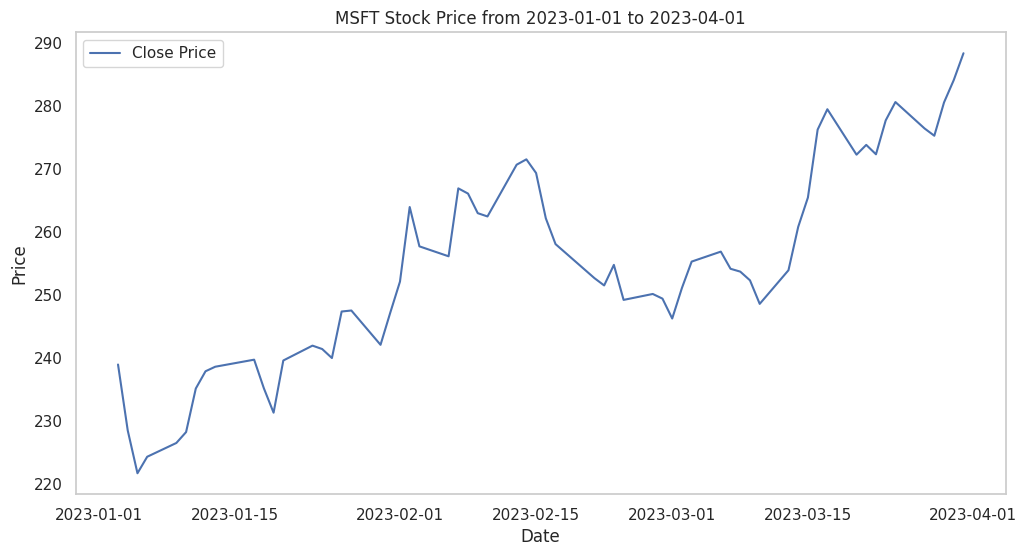

In [ ]:
# Create a plot of the stock data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{symbol} Stock Price from {start_date} to {end_date}')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import requests
import json
from time import sleep

# Replace with your Alpha Vantage API key
api_key = '7LRS7R96FIBXB38Q'

# List of top 10 stock symbols (replace with actual symbols)
top_100_stocks = [
    'AAPL','MSFT','AMZN','GOOGL','FB','TSLA','JPM','V','JNJ','MA'
]


# DataFrame to store stock data
stock_data = pd.DataFrame()

for stock in top_100_stocks:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={stock}&apikey={api_key}&outputsize=compact'

    response = requests.get(url)
    data = json.loads(response.text)

    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        df = pd.DataFrame(time_series).T
        df.reset_index(inplace=True)
        df['symbol'] = stock
        stock_data = stock_data.append(df, ignore_index=True)

    # Alpha Vantage has a limit of 5 requests per minute
    sleep(60 / 5)

# Rename columns
stock_data.columns = ['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient', 'symbol']

# Filter data for the last 30 days
stock_data['date'] = pd.to_datetime(stock_data['date'])
last_30_days = pd.to_datetime('today') - pd.Timedelta(days=30)
filtered_data = stock_data[stock_data['date'] >= last_30_days]

print(filtered_data)


<ipython-input-39-1781590a82e6>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(df, ignore_index=True)
<ipython-input-39-1781590a82e6>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(df, ignore_index=True)
<ipython-input-39-1781590a82e6>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(df, ignore_index=True)
<ipython-input-39-1781590a82e6>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(df, ignore_index=True)
<ipython-input-39-1781590a82e6>:29: FutureWarning: The frame.append method is deprecated and will be

          date    open     high     low   close    adjusted_close    volume  \
0   2023-04-14  164.59   166.32  163.82  165.21            165.21  49386480   
1   2023-04-13  161.63    165.8  161.42  165.56            165.56  68445649   
2   2023-04-12  161.22   162.06  159.78   160.1             160.1  50133062   
3   2023-04-11  162.35   162.36  160.51   160.8             160.8  47644217   
4   2023-04-10  161.42   162.03  160.08  162.03            162.03  47716882   
..         ...     ...      ...     ...     ...               ...       ...   
814 2023-03-24  350.45   352.42  346.31  351.63  351.079914644857   2971590   
815 2023-03-23  352.41  359.855  351.84  354.37  353.815628224833   2598053   
816 2023-03-22  354.61    360.0  351.03  351.03  350.480853276979   2596388   
817 2023-03-21  354.37    356.2  350.83  354.57  354.015315347459   3766785   
818 2023-03-20   348.0  353.835  347.34  349.32  348.773528378527   3864278   

    dividend_amount split_coefficient symbol  
0   

In [ ]:
filtered_data.shape

filtered_data

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,symbol
0,2023-04-14,164.59,166.32,163.82,165.21,165.21,49386480,0.0000,1.0,AAPL
1,2023-04-13,161.63,165.8,161.42,165.56,165.56,68445649,0.0000,1.0,AAPL
2,2023-04-12,161.22,162.06,159.78,160.1,160.1,50133062,0.0000,1.0,AAPL
3,2023-04-11,162.35,162.36,160.51,160.8,160.8,47644217,0.0000,1.0,AAPL
4,2023-04-10,161.42,162.03,160.08,162.03,162.03,47716882,0.0000,1.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
814,2023-03-24,350.45,352.42,346.31,351.63,351.079914644857,2971590,0.0000,1.0,MA
815,2023-03-23,352.41,359.855,351.84,354.37,353.815628224833,2598053,0.0000,1.0,MA
816,2023-03-22,354.61,360.0,351.03,351.03,350.480853276979,2596388,0.0000,1.0,MA
817,2023-03-21,354.37,356.2,350.83,354.57,354.015315347459,3766785,0.0000,1.0,MA


In [ ]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [ ]:
!pip install pandas requests beautifulsoup4 lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
from newsapi import NewsApiClient
import requests
from bs4 import BeautifulSoup

api_key = '3329b59870034e358f4ac06743d542b0'
newsapi = NewsApiClient(api_key=api_key)

stock_names = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'AMZN': 'Amazon.com, Inc.',
    'GOOGL': 'Alphabet Inc. (Google Class A)',
    'FB': 'Facebook, Inc.',
    'TSLA': 'Tesla, Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'V': 'Visa Inc.',
    'JNJ': 'Johnson & Johnson',
    'MA': 'Mastercard Incorporated'
}

language = 'en'
sort_by = 'relevancy'
page_size = 10

to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=30)

allowed_domains = 'finance.yahoo.com,fool.com,nasdaq.com,marketbeat.com,benzinga.com'

def extract_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([p.get_text() for p in paragraphs])
    return text

all_articles = []

for stock_symbol, stock_name in stock_names.items():
    query = f'{stock_name}'
    articles = newsapi.get_everything(q=query,
                                      language=language,
                                      sort_by=sort_by,
                                      page_size=page_size,
                                      domains=allowed_domains,
                                      from_param=from_date.isoformat(),
                                      to=to_date.isoformat())['articles']
    for article in articles:
        article_text = extract_text_from_url(article['url'])
        timestamp = datetime.datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
        all_articles.append((stock_symbol, article_text, timestamp))

all_articles.sort(key=lambda x: x[2])

with open('news_articles.txt', 'w', encoding='utf-8') as f:
    for stock_symbol, article_text, timestamp in all_articles:
        f.write(f'{stock_symbol} ({timestamp}): {article_text}\n')


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from datetime import timedelta
import re

# Read stock data from CSV file
stock_data = pd.read_csv('filtered_data.csv')

# Calculate additional features like daily returns
stock_data['daily_return'] = stock_data.groupby('symbol')['adjusted_close'].pct_change()

# Preprocess the news article data
news_data = []

with open('news_articles.txt', 'r', encoding='utf-8') as f:
    for line in f:
        match = re.match(r'(\w+)\s\((.+)\): (.+)', line.strip())
        if match:
            symbol, timestamp, text = match.groups()
            news_data.append({'symbol': symbol, 'text': text})
        else:
            print(f"Failed to parse line: {line.strip()}")

news_data = pd.DataFrame(news_data)

# Calculate sentiment scores for each news article
news_data['sentiment'] = news_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate the sentiment scores for each stock symbol
news_sentiment = news_data.groupby('symbol')['sentiment'].mean().reset_index()

# Merge the stock data and news sentiment data into a single DataFrame
merged_data = stock_data.merge(news_sentiment, on='symbol')

# Convert the 'date' column to a datetime object and sort by date
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data = merged_data.sort_values(['symbol', 'date'])

# Create a target variable: next week's return
merged_data['next_week_return'] = merged_data.groupby('symbol')['adjusted_close'].shift(-5) / merged_data['adjusted_close'] - 1

# Drop the last 5 days for each stock, as we don't have future data for those days
merged_data = merged_data.groupby('symbol').apply(lambda x: x.iloc[:-5]).reset_index(drop=True)

# Save the merged data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)


Failed to parse line: Invest better with The Motley Fool. Get stock recommendations, portfolio guidance, and more from The Motley Fool's premium services.
Failed to parse line: Making the world smarter, happier, and richer.  Market data powered by Xignite.
Failed to parse line: Invest better with The Motley Fool. Get stock recommendations, portfolio guidance, and more from The Motley Fool's premium services.
Failed to parse line: Making the world smarter, happier, and richer.  Market data powered by Xignite.
Failed to parse line: Invest better with The Motley Fool. Get stock recommendations, portfolio guidance, and more from The Motley Fool's premium services.
Failed to parse line: Making the world smarter, happier, and richer.  Market data powered by Xignite.
Failed to parse line: Invest better with The Motley Fool. Get stock recommendations, portfolio guidance, and more from The Motley Fool's premium services.
Failed to parse line: Making the world smarter, happier, and richer.  Mark

In [ ]:
merged_data.shape

(84, 13)

In [ ]:
filtered_data.shape

(171, 10)

In [ ]:
# NVIDIA (NVDA)	90.1%
# Meta Platforms (META)	76.1%
# Tesla (TSLA)	68.4%
# Warner Bros. Discovery (WBD)	59.3%
# Align Technology (ALGN)	58.4%
# Advanced Micro Devices (AMD)	51.3%
# Salesforce (CRM)	50.7%
# West Pharmaceutical Systems (WST)	47.2%
# General Electric (GE)	46.2%
# Catalent (CTLT)

In [ ]:
# Apple (AAPL)	26.9%
# Microsoft (MSFT)	20.2%
# Alphabet (GOOGL)	17.6%
# Amazon (AMZN)	23.0%
# # Tesla (TSLA)

In [ ]:
# First Republic Bank (FRC)	-88.5%
# Zions Bancorporation (ZION)	-39.1%
# Charles Schwab (SCHW)	-37.1%
# Comerica (CMA)	-35.0%
# DISH Network (DISH)